In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, k, sigma
from scipy.integrate import quad
import csv

Goal: make a table with the different color indices over different temperatures from 3000-12,000K in 200K increments.

Color index is the difference in magnitude between two different filter bands.

In [20]:
def T_eff(L, R):
    return (L/(4*np.pi*R**2*sigma))**(1/4)

In [11]:
# spectral energy distribution (SED) of the object. Wavelength in nm
def planck_function(wavelength, T):
    return 2*h*c**2/(wavelength**5*(np.exp(h*c/(wavelength*k*T))-1))

In [12]:
def planck_function(wavelength, temperature):
    # Convert wavelength from nanometers to meters for calculations
    wavelength_m = wavelength * 1e-9
    # Calculate the Planck function (in units of W/m^2/m)
    numerator = 2 * h * c**2 / wavelength_m**5
    denominator = np.exp(h * c / (wavelength_m * k * temperature)) - 1
    return numerator / denominator

In [ ]:
# define the filters as their central wavelength, FWHM 
filters = {
    "U": (360, 70),
    "B": (440, 100),
    "V": (550, 90),
    "R": (650, 100),
    "I": (800, 150)
}

In [24]:
def box_function(wavelength, central, fwhm):
    # Check if the wavelength is within the FWHM range
    lower_bound = central - fwhm / 2
    upper_bound = central + fwhm / 2
    return 1.0 if lower_bound <= wavelength <= upper_bound else 0.0

In [21]:
def integrate_flux(temperature, central, fwhm):
    # Define the integration limits (in nm)
    lower_limit = central - fwhm / 2
    upper_limit = central + fwhm / 2

    # Define the integrand function
    def integrand(wavelength):
        return planck_function(wavelength, temperature) * box_function(wavelength, central, fwhm)

    # Perform the integration
    flux, _ = quad(integrand, lower_limit, upper_limit)
    return flux

In [16]:
temperature_vega = 10800  # Effective temperature of Vega in K
flux_vega = {
    band: integrate_flux(temperature_vega, central, fwhm)
    for band, (central, fwhm) in filters.items()
}

In [ ]:
def calculate_magnitude(temperature, central, fwhm, flux_vega):
    flux = integrate_flux(temperature, central, fwhm)
    magnitude = -2.5 * np.log10(flux / flux_vega)
    return magnitude

In [ ]:
temperatures = np.arange(3000, 12001, 200)  # From 3000 K to 12000 K in 200 K increments
color_indices = []

for temp in temperatures:
    magnitudes = {
        band: calculate_magnitude(temp, central, fwhm, flux_vega[band])
        for band, (central, fwhm) in filters.items()
    }
    # Calculate color indices
    u_b = magnitudes["U"] - magnitudes["B"]
    b_v = magnitudes["B"] - magnitudes["V"]
    v_r = magnitudes["V"] - magnitudes["R"]
    r_i = magnitudes["R"] - magnitudes["I"]
    color_indices.append((temp, u_b, b_v, v_r, r_i))

In [19]:
# Define the filename
filename = "bb_color_indices.csv"

# Write the data to a CSV file
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["Temperature (K)", "U-B", "B-V", "V-R", "R-I"])
    
    # Write each row of color indices
    for temp, u_b, b_v, v_r, r_i in color_indices:
        writer.writerow([temp, u_b, b_v, v_r, r_i])

print(f"Data saved to {filename}")

Data saved to bb_color_indices.csv


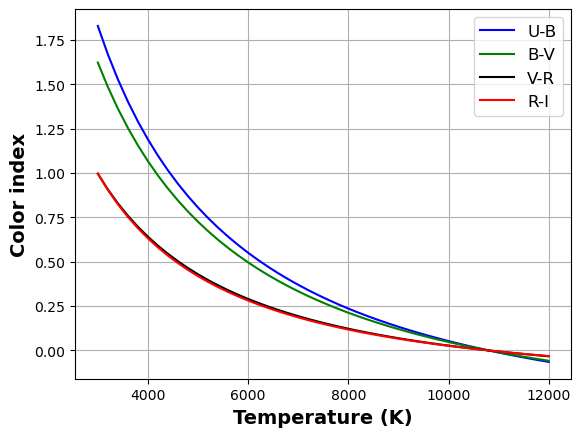

In [ ]:
# now make plots of the color indices
plt.xlabel("Temperature (K)", fontsize=14, fontweight='bold')
plt.ylabel("Color index", fontsize=14, fontweight='bold')

plt.plot(temperatures, [u_b for temp, u_b, b_v, v_r, r_i in color_indices], label="U-B", color='b')
plt.plot(temperatures, [b_v for temp, u_b, b_v, v_r, r_i in color_indices], label="B-V", color='g')
plt.plot(temperatures, [v_r for temp, u_b, b_v, v_r, r_i in color_indices], label="V-R", color='k')
plt.plot(temperatures, [r_i for temp, u_b, b_v, v_r, r_i in color_indices], label="R-I", color='r')

plt.grid()
plt.legend(fontsize=12)
# plt.savefig('color_indices_plot.png')

Homework complete! Now make color indices for g, r, i filters which I will be using for the project.

In [46]:
LCO_filters = {
    "g": (477, 150),
    "r": (621.5, 139),
    "i": (754.5, 129)
}

In [48]:
LCO_flux_vega = {
    band: integrate_flux(temperature_vega, central, fwhm)
    for band, (central, fwhm) in LCO_filters.items()
}

In [49]:
LCO_color_indices = []

for temp in temperatures:
    magnitudes = {
        band: calculate_magnitude(temp, central, fwhm, LCO_flux_vega[band])
        for band, (central, fwhm) in LCO_filters.items()
    }
    # Calculate color indices
    g_r = magnitudes["g"] - magnitudes["r"]
    r_i = magnitudes["r"] - magnitudes["i"]
    g_i = magnitudes["g"] - magnitudes["i"]
    LCO_color_indices.append((temp, g_r, r_i, g_i))

In [50]:
# Define the filename
filename = "LCO_bb_color_indices.csv"

# Write the data to a CSV file
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["Temperature (K)", "g-r", "r-i", "g-i"])
    
    # Write each row of color indices
    for temp, g_r, r_i, g_i in LCO_color_indices:
        writer.writerow([temp, g_r, r_i, g_i])

print(f"Data saved to {filename}")

Data saved to LCO_bb_color_indices.csv


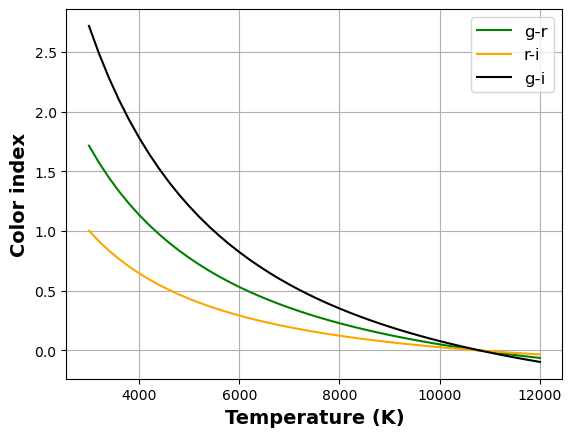

In [55]:
# now make plots of the color indices
plt.xlabel("Temperature (K)", fontsize=14, fontweight='bold')
plt.ylabel("Color index", fontsize=14, fontweight='bold')

plt.plot(temperatures, [g_r for temp, g_r, r_i, g_i in LCO_color_indices], label="g-r", color='g')
plt.plot(temperatures, [r_i for temp, g_r, r_i, g_i in LCO_color_indices], label="r-i", color='orange')
plt.plot(temperatures, [g_i for temp, g_r, r_i, g_i in LCO_color_indices], label="g-i", color='k')

plt.grid()
plt.legend(fontsize=12)